# Le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Les données de l'évolution du prix du blé et du salaire moyen entre 1565 et 1821 sont disponibles sur le site de [Vincent Arel](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une 5 années de la période demandée. Nous téléchargeons toujours le jeu de données complet.

In [2]:
data_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"

In [3]:
data_file = "wheat.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Voici l'explication des colonnes données [sur le site d'origine](https://vincentarelbundock.github.io/Rdatasets/doc/HistData/Wheat.html):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| rownames           | Numéro de la ligne                                                                                                     |
| Year      | La valeur numérique de l'année, regroupées en période de 5 années. Par exemple, 1520 correspond à la période 1520-1524                                                                                              |
| Wheat            | Estimation du prix du blé (en shilling et pence) sur cette période                                                                       |
| Wages        | Estimation du salaire moyen des ouvriers anglais (en shilling)                                                |


Nous souhaitons que la tableau reprenne le numéro des lignes présents dans le fichier csv, ce que nous spécifions par `index_col="rownames"`.

In [4]:
raw_data = pd.read_csv(data_file, index_col="rownames")
raw_data

Year  Wheat  Wages
rownames                    
1         1565   41.0   5.00
2         1570   45.0   5.05
3         1575   42.0   5.08
4         1580   49.0   5.12
5         1585   41.5   5.15
6         1590   47.0   5.25
7         1595   64.0   5.54
8         1600   27.0   5.61
9         1605   33.0   5.69
10        1610   32.0   5.78
11        1615   33.0   5.94
12        1620   35.0   6.01
13        1625   33.0   6.12
14        1630   45.0   6.22
15        1635   33.0   6.30
16        1640   39.0   6.37
17        1645   53.0   6.45
18        1650   42.0   6.50
19        1655   40.5   6.60
20        1660   46.5   6.75
21        1665   32.0   6.80
22        1670   37.0   6.90
23        1675   43.0   7.00
24        1680   35.0   7.30
25        1685   27.0   7.60
26        1690   40.0   8.00
27        1695   50.0   8.50
28        1700   30.0   9.00
29        1705   32.0  10.00
30        1710   44.0  11.00
31        1715   33.0  11.75
32        1720   29.0  12.50
33        1725   39.0  13.00
34        1730   26.0  13.30
35        1735   32.0  13.60
36        1740   27.0  14.00
37        1745   27.5  14.50
38        1750   31.0  15.00
39        1755   35.5  15.70
40        1760   31.0  16.50
41        1765   43.0  17.60
42        1770   47.0  18.50
43        1775   44.0  19.50
44        1780   46.0  21.00
45        1785   42.0  23.00
46        1790   47.5  25.50
47        1795   76.0  27.50
48        1800   79.0  28.50
49        1805   81.0  29.50
50        1810   99.0  30.00
51        1815   78.0    NaN
52        1820   54.0    NaN
53        1821   54.0    NaN

Y a-t-il des points manquants dans ce jeux de données ? Oui, les années 1815, 1820 et 1821 n'ont pas de données sur la valeur du salaire hebdomadaire.

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Year  Wheat  Wages
rownames                    
51        1815   78.0    NaN
52        1820   54.0    NaN
53        1821   54.0    NaN

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [6]:
data = raw_data.dropna().copy()
data

Year  Wheat  Wages
rownames                    
1         1565   41.0   5.00
2         1570   45.0   5.05
3         1575   42.0   5.08
4         1580   49.0   5.12
5         1585   41.5   5.15
6         1590   47.0   5.25
7         1595   64.0   5.54
8         1600   27.0   5.61
9         1605   33.0   5.69
10        1610   32.0   5.78
11        1615   33.0   5.94
12        1620   35.0   6.01
13        1625   33.0   6.12
14        1630   45.0   6.22
15        1635   33.0   6.30
16        1640   39.0   6.37
17        1645   53.0   6.45
18        1650   42.0   6.50
19        1655   40.5   6.60
20        1660   46.5   6.75
21        1665   32.0   6.80
22        1670   37.0   6.90
23        1675   43.0   7.00
24        1680   35.0   7.30
25        1685   27.0   7.60
26        1690   40.0   8.00
27        1695   50.0   8.50
28        1700   30.0   9.00
29        1705   32.0  10.00
30        1710   44.0  11.00
31        1715   33.0  11.75
32        1720   29.0  12.50
33        1725   39.0  13.00
34        1730   26.0  13.30
35        1735   32.0  13.60
36        1740   27.0  14.00
37        1745   27.5  14.50
38        1750   31.0  15.00
39        1755   35.5  15.70
40        1760   31.0  16.50
41        1765   43.0  17.60
42        1770   47.0  18.50
43        1775   44.0  19.50
44        1780   46.0  21.00
45        1785   42.0  23.00
46        1790   47.5  25.50
47        1795   76.0  27.50
48        1800   79.0  28.50
49        1805   81.0  29.50
50        1810   99.0  30.00

Nous voulons maintenant nous assurer que les valeurs des années sont bien des nombres entiers.

In [7]:
data['Year'] = data['Year'].astype(int)

Nous pouvons désormais réaliser le graphe de [Playfair](https://fr.wikipedia.org/wiki/William_Playfair) qui représente l'évolution du prix du blé et du salaire moyen sur la période (1565-1810)

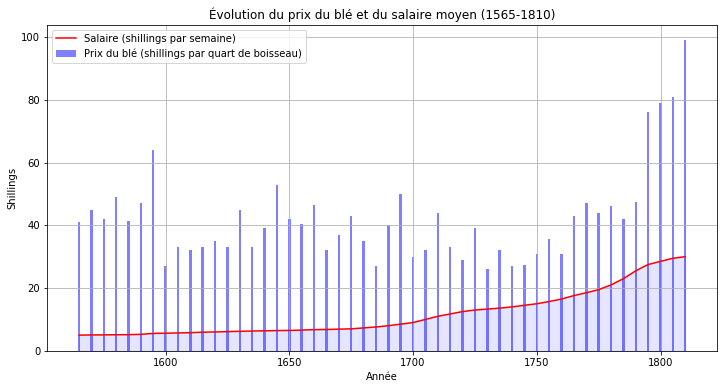

In [8]:
plt.figure(figsize=(12, 6))
plt.bar(data['Year'], data['Wheat'], color='blue', alpha=0.5, label='Prix du blé (shillings par quart de boisseau)', width=1.0)
plt.plot(data['Year'], data['Wages'], color='red', label='Salaire (shillings par semaine)')
plt.fill_between(data['Year'], data['Wages'], color='blue', alpha=0.1)
plt.xlabel('Année')
plt.ylabel('Shillings')
plt.title("Évolution du prix du blé et du salaire moyen (1565-1810)")
plt.legend()
plt.grid(True)
plt.show()

Nous allons maintenant tenter d'améliorer la présentation de ces données. Pour cela, nous allons combiner le prix du blé et le salaire hebdomadaire afin de représenter, dans leurs valeurs respectives, ces informations.

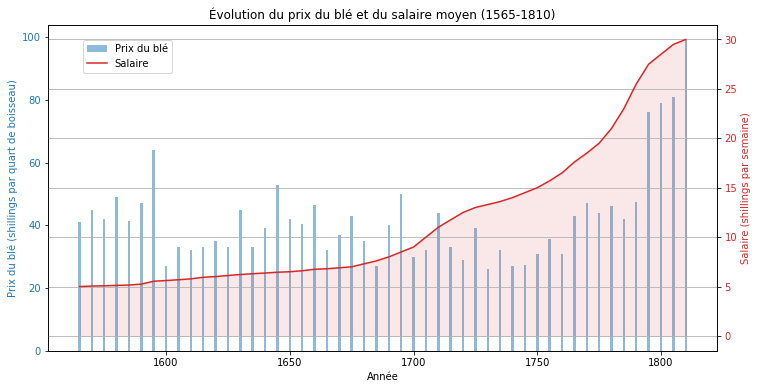

In [9]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Année')
ax1.set_ylabel('Prix du blé (shillings par quart de boisseau)', color=color)
ax1.bar(data['Year'], data['Wheat'], color=color, alpha=0.5, label='Prix du blé', width=1.0)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Salaire (shillings par semaine)', color=color)
ax2.plot(data['Year'], data['Wages'], color=color, label='Salaire')
ax2.fill_between(data['Year'], data['Wages'], color=color, alpha=0.1)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Évolution du prix du blé et du salaire moyen (1565-1810)")
fig.legend(loc="upper left", bbox_to_anchor=(0.09, 0.82))
plt.grid(True)
plt.show()

Nous voulons maintenant montrer que le pouvoir d'achat des ouvriers a augmenté dans le temps.

Pour cela, nous allons ajouter une nouvelle colonne à notre tableau, qui va être le pouvoir d'achat des ouvriers anglais. Ce pouvoir d'achat est calculé comme la quantité de blé qu'un ouvrier peut s'acheter avec son salaire hebdomadaire.

In [10]:
data['PouvoirAchat'] = data['Wages'] / data['Wheat']
data

Year  Wheat  Wages  PouvoirAchat
rownames                                  
1         1565   41.0   5.00      0.121951
2         1570   45.0   5.05      0.112222
3         1575   42.0   5.08      0.120952
4         1580   49.0   5.12      0.104490
5         1585   41.5   5.15      0.124096
6         1590   47.0   5.25      0.111702
7         1595   64.0   5.54      0.086563
8         1600   27.0   5.61      0.207778
9         1605   33.0   5.69      0.172424
10        1610   32.0   5.78      0.180625
11        1615   33.0   5.94      0.180000
12        1620   35.0   6.01      0.171714
13        1625   33.0   6.12      0.185455
14        1630   45.0   6.22      0.138222
15        1635   33.0   6.30      0.190909
16        1640   39.0   6.37      0.163333
17        1645   53.0   6.45      0.121698
18        1650   42.0   6.50      0.154762
19        1655   40.5   6.60      0.162963
20        1660   46.5   6.75      0.145161
21        1665   32.0   6.80      0.212500
22        1670   37.0   6.90      0.186486
23        1675   43.0   7.00      0.162791
24        1680   35.0   7.30      0.208571
25        1685   27.0   7.60      0.281481
26        1690   40.0   8.00      0.200000
27        1695   50.0   8.50      0.170000
28        1700   30.0   9.00      0.300000
29        1705   32.0  10.00      0.312500
30        1710   44.0  11.00      0.250000
31        1715   33.0  11.75      0.356061
32        1720   29.0  12.50      0.431034
33        1725   39.0  13.00      0.333333
34        1730   26.0  13.30      0.511538
35        1735   32.0  13.60      0.425000
36        1740   27.0  14.00      0.518519
37        1745   27.5  14.50      0.527273
38        1750   31.0  15.00      0.483871
39        1755   35.5  15.70      0.442254
40        1760   31.0  16.50      0.532258
41        1765   43.0  17.60      0.409302
42        1770   47.0  18.50      0.393617
43        1775   44.0  19.50      0.443182
44        1780   46.0  21.00      0.456522
45        1785   42.0  23.00      0.547619
46        1790   47.5  25.50      0.536842
47        1795   76.0  27.50      0.361842
48        1800   79.0  28.50      0.360759
49        1805   81.0  29.50      0.364198
50        1810   99.0  30.00      0.303030

On peut maintenant regarder quelle est cette évolution dans le temps, sous une forme linéaire.

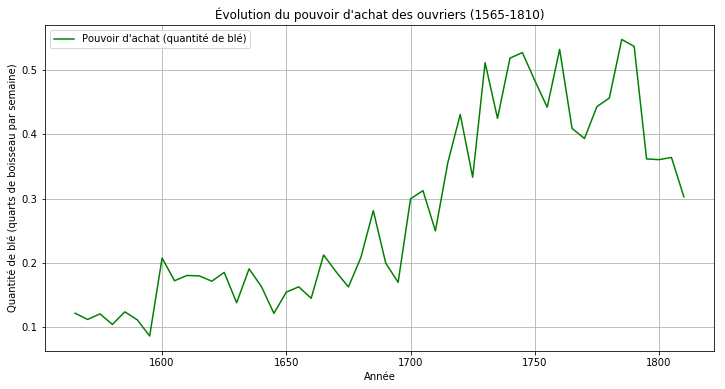

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['PouvoirAchat'], color='green', label='Pouvoir d\'achat (quantité de blé)')
plt.xlabel('Année')
plt.ylabel('Quantité de blé (quarts de boisseau par semaine)')
plt.title("Évolution du pouvoir d'achat des ouvriers (1565-1810)")
plt.legend()
plt.grid(True)
plt.show()

Nous pouvons aussi représenter cela sous la forme d'un nuage de points, avec en abscisse le prix du blé et en ordonnée le salaire hebdomadaire des ouvriers.

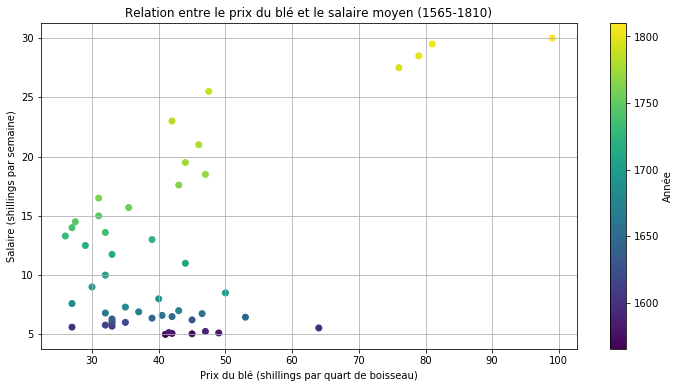

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(data['Wheat'], data['Wages'], c=data['Year'], cmap='viridis', label='Données')
plt.xlabel('Prix du blé (shillings par quart de boisseau)')
plt.ylabel('Salaire (shillings par semaine)')
plt.title("Relation entre le prix du blé et le salaire moyen (1565-1810)")
plt.colorbar(label='Année')
plt.grid(True)
plt.show()

Je trouve que le premier graphique est le plus représentatif du pouvoir d'achat des ouvriers anglais.